In [27]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense 
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
folder = "AI_Programming"
project_dir = "dnn"

base_path = Path("/content/gdrive/My Drive/")
project_path = base_path / folder / project_dir
os.chdir(project_path)
for x in list(project_path.glob("*")):
    if x.is_dir():
        dir_name = str(x.relative_to(project_path))
        os.rename(dir_name, dir_name.split(" ", 1)[0])
print(f"현재 디렉토리 위치: {os.getcwd()}")

현재 디렉토리 위치: /content/gdrive/My Drive/AI_Programming/dnn


In [ ]:
data = pd.read_csv("/content/gdrive/My Drive/AI_Programming/dnn/samsung.csv")

In [ ]:
print(data)

           date  close  start   high    low    volume  transactionPrice  \
0    2022-11-22  60600  60900  61200  60300   9411289      5.714610e+11   
1    2022-11-21  61400  61400  61800  60800   9378097      5.737830e+11   
2    2022-11-18  61800  61800  62400  61400  12236503      7.574550e+11   
3    2022-11-17  61400  62000  62000  61300  13298296      8.191190e+11   
4    2022-11-16  62700  62400  62700  61700  12909260      8.042200e+11   
..          ...    ...    ...    ...    ...       ...               ...   
243  2021-11-26  72300  73500  74100  72000  13002242      9.443780e+11   
244  2021-11-25  73700  75100  75100  73600  12559258      9.295710e+11   
245  2021-11-24  74800  76000  76200  74100  15652305      1.174200e+12   
246  2021-11-23  75300  76000  76000  74500  22029195      1.656720e+12   
247  2021-11-22  74900  73300  75200  73000  27506623      2.047230e+12   

     capitalization  
0      3.617690e+14  
1      3.665450e+14  
2      3.689330e+14  
3      3.66

In [ ]:
col = data[['close', 'start', 'high', 'low', 'volume', 'transactionPrice', 'capitalization']]

MMS = MinMaxScaler(feature_range=(0,1))
MMS_fit = MMS.fit(col)
row = MMS.transform(col)

df = pd.DataFrame(row, columns=col.columns)
print(df)

        close     start      high       low    volume  transactionPrice  \
0    0.286738  0.303887  0.279412  0.299296  0.113235          0.100030   
1    0.315412  0.321555  0.301471  0.316901  0.112203          0.101046   
2    0.329749  0.335689  0.323529  0.338028  0.201041          0.181389   
3    0.315412  0.342756  0.308824  0.334507  0.234042          0.208362   
4    0.362007  0.356890  0.334559  0.348592  0.221950          0.201845   
..        ...       ...       ...       ...       ...               ...   
243  0.706093  0.749117  0.753676  0.711268  0.224840          0.263153   
244  0.756272  0.805654  0.790441  0.767606  0.211073          0.256676   
245  0.795699  0.837456  0.830882  0.785211  0.307203          0.363683   
246  0.813620  0.837456  0.823529  0.799296  0.505394          0.574749   
247  0.799283  0.742049  0.794118  0.746479  0.675631          0.745568   

     capitalization  
0          0.286738  
1          0.315413  
2          0.329751  
3          

In [28]:
df_corr = df.corr()
df_corr_sort = df_corr.sort_values('close', ascending = False)
df_corr_sort['close'].head(10)

close               1.000000
capitalization      1.000000
high                0.998324
low                 0.997926
start               0.995367
transactionPrice    0.248981
volume             -0.094286
Name: close, dtype: float64

In [29]:
X = df.iloc[:, :]
# print("X모양", X)

y = df.iloc[:, 0]
# print("y모양", y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state=777)

In [38]:
model = Sequential()
model.add(Dense(128, input_dim = 7, activation = 'relu'))
# model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
# model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))
model.summary

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['MSE'])

In [39]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 20)
modelpath = '/content/gdrive/My Drive/AI_Programming/dnn/samsung_best_model.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 0, save_best_only = True)

In [40]:
history = model.fit(X_train, y_train, epochs = 1000, batch_size = 32, validation_split = 0.25, verbose = 1, callbacks = [early_stopping_callback, checkpointer])

Epoch 1/1000
5/5 [==============================] - 1s 105ms/step - loss: 0.1246 - MSE: 0.1246 - val_loss: 0.0024 - val_MSE: 0.0024
Epoch 2/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.0137 - MSE: 0.0137 - val_loss: 0.0223 - val_MSE: 0.0223
Epoch 3/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0169 - MSE: 0.0169 - val_loss: 0.0023 - val_MSE: 0.0023
Epoch 4/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0018 - MSE: 0.0018 - val_loss: 0.0041 - val_MSE: 0.0041
Epoch 5/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0066 - MSE: 0.0066 - val_loss: 0.0037 - val_MSE: 0.0037
Epoch 6/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0024 - MSE: 0.0024 - val_loss: 5.8873e-04 - val_MSE: 5.8873e-04
Epoch 7/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0012 - MSE: 0.0012 - val_loss: 0.0020 - val_MSE: 0.0020
Epoch 8/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.

In [41]:
list_y_test = np.array(y_test)

2/2 [==============================] - 0s 7ms/step
Real price: 67854.83870967742, Expected price: 67860.6484375
Real price: 67453.40501792115, Expected price: 67484.671875
Real price: 56112.903225806454, Expected price: 56294.28515625
Real price: 61833.33333333333, Expected price: 61816.5625
Real price: 61732.97491039426, Expected price: 61754.859375
Real price: 61431.89964157705, Expected price: 61449.8984375
Real price: 59725.8064516129, Expected price: 59672.83203125
Real price: 67453.40501792115, Expected price: 67462.359375
Real price: 56915.77060931899, Expected price: 56931.91796875
Real price: 66951.6129032258, Expected price: 66935.5
Real price: 67252.68817204301, Expected price: 67268.78125
Real price: 72872.75985663082, Expected price: 72873.2734375
Real price: 67854.83870967742, Expected price: 67838.015625
Real price: 70163.08243727598, Expected price: 70161.0703125
Real price: 74980.28673835125, Expected price: 74981.140625
Real price: 69560.93189964158, Expected price: 6

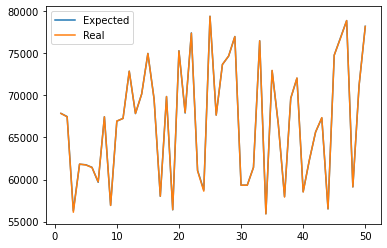

In [42]:
real_prices = []
pred_prices = []
X_num = []
n_iter = 0
Y_prediction = model.predict(X_test).flatten()

Max = 80500
Min = 52500

close_max = list_y_test*(Max - Min)+Min
close_min = Y_prediction*(Max - Min)+Min

for i in range(50):
  real = close_max[i]
  prediction = close_min[i]
  print('Real price: {}, Expected price: {}'.format(real, prediction))
  real_prices.append(real)
  pred_prices.append(prediction)
  n_iter = n_iter + 1
  X_num.append(n_iter)
  
plt.plot(X_num, pred_prices, label = 'Expected')
plt.plot(X_num, real_prices, label = 'Real')
plt.legend()
plt.show()